In [1]:
from classes import *
import SessionState
from sklearn.manifold import TSNE

# all plot with size = [20,16]
plt.rcParams['figure.figsize'] = [20, 16]

In [2]:

"""
Simulation parameters
"""
p_sim = {}
p_sim['n_samples'] = 1000
p_sim['n_features'] = 25
#p_sim['beta'] = [0.01 * (p_sim['n_features'] - i) / p_sim['n_features'] for i in range(0, p_sim['n_features'])]


idx = np.arange( p_sim['n_features'])
beta = (-1) ** idx * np.exp(-idx/ 10.)
beta_norm = np.linalg.norm(beta)
p_beta = 1.
p_sim['beta'] = p_beta * beta / beta_norm  #/10  (-1) ** idx * np.exp(-idx/10.)#
# select five 5 features
#p_sim['beta'] = np.array([0.1, -0.1, 0.1, -0.1, 0.1,0.1]+[0.]*(p_sim['n_features']-6))


p_sim['alpha'] = 2#1
p_sim['lamb'] = 1
p_sim['coef_tt'] = .8
p_sim['rho'] =1 # 0.2 #1
p_sim['kappa'] = 3.
p_sim['wd_param'] = 4. #4. # 40



p_sim['path_data'] = "./sim_surv"

"""
Model parameters
"""

p_survcaus = {}
p_survcaus['num_durations'] = 25
p_survcaus['encoded_features'] = 20
p_survcaus['alpha_wass'] = 1
p_survcaus['batch_size'] = 256
p_survcaus['epochs'] = 100
p_survcaus['lr'] = 1e-2
p_survcaus['patience'] = 10



In [3]:
nep = Neptune("test")
nep.create_experiment()
# send parameters to neptune
nep.send_dict(p_sim, "p_sim",num_run=0)
nep.experiment['beta'] = p_sim['beta']


2021-11-21 21:29:26.548 WARNING neptune.internal.hardware.gpu.gpu_monitor: Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs-legacy.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 


https://app.neptune.ai/SurvCaus/RUNS/e/RUN-92
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [4]:
# sin(πXi1Xi2) + 2(Xi3 − 0.5)2 + Xi4 + 0.5Xi5
f1 = lambda x : np.sin(np.pi*x[:,0]*x[:,1] + 2*(x[:,2]-0.5)**2 + x[:,3] + 0.5*x[:,4])

# 2 log(1 + exp(Xi1+Xi2+Xi3 )
f2 = lambda x : np.log(1 + np.exp(x[:,0] + x[:,1] + x[:,2]))

#  (max{Xi1 + Xi2 + Xi3, 0} + max{Xi4 + Xi5, 0}) /2
f3 = lambda x : (np.maximum(x[:,0] + x[:,1] + x[:,2], 0) + np.maximum(x[:,3] + x[:,4], 0)) / 2

#  max{Xi1 + Xi2, Xi3, 0} + max{Xi4 + Xi5, 0}
f4 = lambda x : (np.maximum(x[:,0] + x[:,1], 0) - np.maximum(x[:,3] + x[:,4], 0))


p_sim['scheme'] = Scheme('nonlinear', f1)
#Scheme('linear') #Scheme('nonlinear',f4) # Scheme('nonlinear', f1)


In [5]:
p_survcaus, p_sim 

({'num_durations': 25,
  'encoded_features': 20,
  'alpha_wass': 1,
  'batch_size': 256,
  'epochs': 100,
  'lr': 0.01,
  'patience': 10},
 {'n_samples': 1000,
  'n_features': 25,
  'beta': array([ 0.42719892, -0.38654557,  0.34976089, -0.31647674,  0.28636   ,
         -0.25910924,  0.23445174, -0.2121407 ,  0.19195285, -0.17368612,
          0.1571577 , -0.14220217,  0.12866984, -0.11642529,  0.10534596,
         -0.09532096,  0.08624997, -0.0780422 ,  0.07061551, -0.06389555,
          0.05781509, -0.05231325,  0.04733499, -0.04283047,  0.03875461]),
  'alpha': 2,
  'lamb': 1,
  'coef_tt': 0.8,
  'rho': 1,
  'kappa': 3.0,
  'wd_param': 4.0,
  'path_data': './sim_surv',
  'scheme': <classes.Scheme at 0x7f18e580c820>})

In [6]:
simu = SimulationNew(p_sim)
data = simu.simulation_surv()
# send data to neptune
nep.send_data(data, "data",num_run=0)
nep.experiment['Scheme'] = simu.sheme_type
nep.experiment['wd'] = simu.wd
nep.experiment['event=1'] = simu.perc_event
nep.experiment['tt=1']= simu.perc_treatement

WD =  0.510368287563324
tt = 1 : 49 % 
event = 1 : 71 %
Scheme :  nonlinear
Wd_para :  4.0


In [7]:
data#.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,tt,T_f_cens,event,T_1,T_0,T_f,T_cf,Xbeta
0,0.575715,0.575715,0.575715,0.575715,0.575715,0.575715,0.575715,0.575715,0.575715,0.575715,...,0.575715,0.575715,0,0.290673,1,0.369519,0.290673,0.290673,0.369519,-0.330632
1,0.735140,0.735140,0.735140,0.735140,0.735140,0.735140,0.735140,0.735140,0.735140,0.735140,...,0.735140,0.735140,0,0.479610,0,0.442472,0.962061,0.962061,0.442472,0.039211
2,0.247292,0.247292,0.247292,0.247292,0.247292,0.247292,0.247292,0.247292,0.247292,0.247292,...,0.247292,0.247292,1,0.338776,1,0.338776,0.817741,0.338776,0.817741,-0.121809
3,0.327721,0.327721,0.327721,0.327721,0.327721,0.327721,0.327721,0.327721,0.327721,0.327721,...,0.327721,0.327721,1,0.417489,1,0.417489,0.810507,0.417489,0.810507,0.064775
4,0.319485,0.319485,0.319485,0.319485,0.319485,0.319485,0.319485,0.319485,0.319485,0.319485,...,0.319485,0.319485,1,1.006905,1,1.006905,0.845513,1.006905,0.845513,0.045667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.292858,0.292858,0.292858,0.292858,0.292858,0.292858,0.292858,0.292858,0.292858,0.292858,...,0.292858,0.292858,1,0.324717,1,0.324717,0.750613,0.324717,0.750613,-0.016104
996,0.745753,0.745753,0.745753,0.745753,0.745753,0.745753,0.745753,0.745753,0.745753,0.745753,...,0.745753,0.745753,0,0.210184,1,0.384056,0.210184,0.210184,0.384056,0.063831
997,0.215329,0.215329,0.215329,0.215329,0.215329,0.215329,0.215329,0.215329,0.215329,0.215329,...,0.215329,0.215329,1,0.169462,0,0.307357,0.417190,0.307357,0.417190,-0.195959
998,0.522828,0.522828,0.522828,0.522828,0.522828,0.522828,0.522828,0.522828,0.522828,0.522828,...,0.522828,0.522828,1,0.141894,0,0.591239,0.815910,0.591239,0.815910,0.517396


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.033892
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.004986


2021-11-21 21:29:43.833 INFO    numexpr.utils: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-11-21 21:29:43.834 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


[t-SNE] KL divergence after 1000 iterations: 0.173094


<ipython-input-8-e7a54b1301e3>:15: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



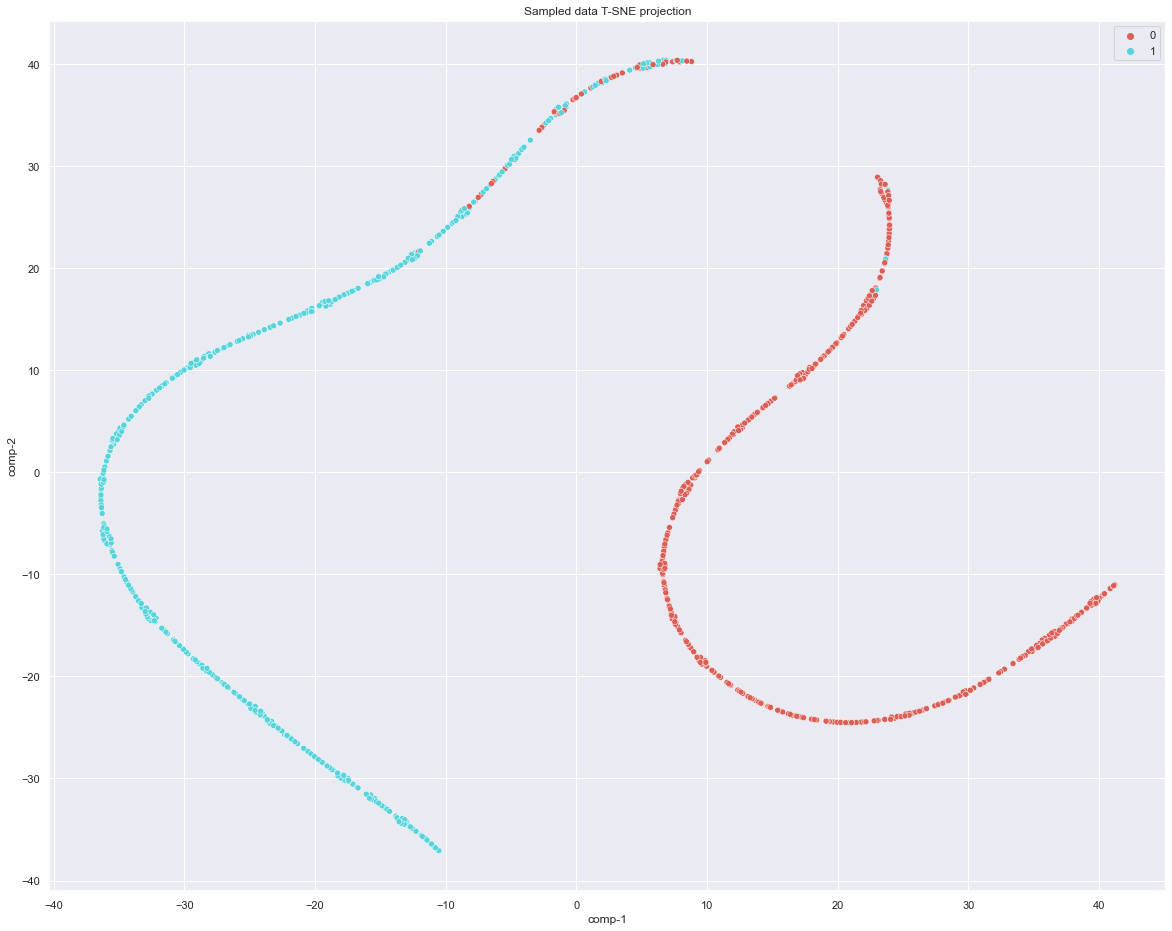

In [8]:
# TSNE

x = data.iloc[:, :p_sim['n_features']]
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
d = pd.DataFrame()
d["tt"] = data[['tt']].values.squeeze()
d["comp-1"] = z[:, 0]
d["comp-2"] = z[:, 1]

fig = plt.figure()
sns.scatterplot(x="comp-1", y="comp-2", hue=d.tt.tolist(),
            palette=sns.color_palette("hls", 2),
            data=d).set(title="Sampled data T-SNE projection")
fig.show()

# send figure to neptune
nep.send_plot(fig, "TSNE initial",num_run=0)


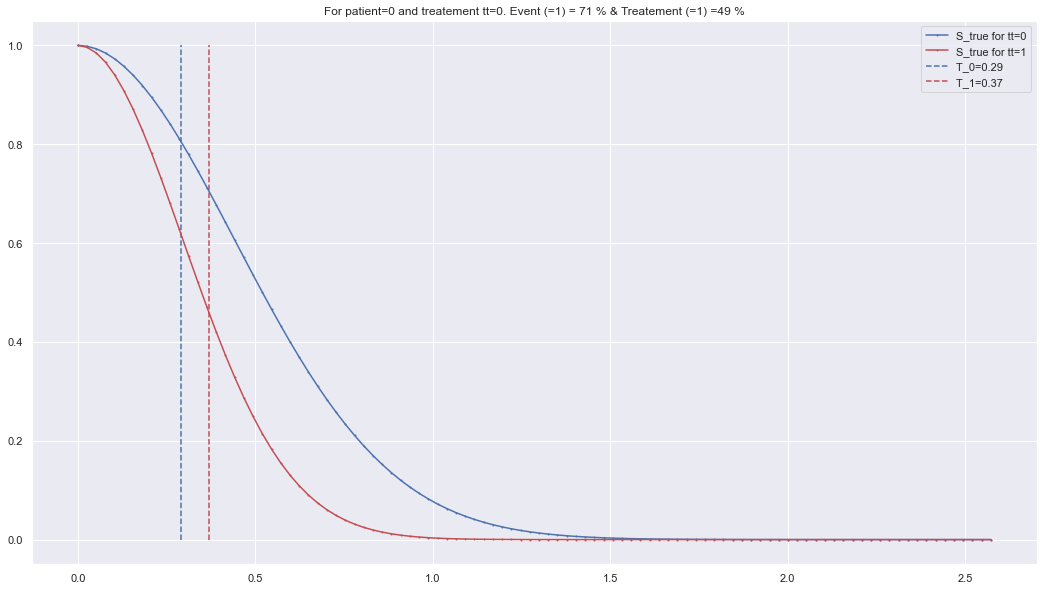

In [9]:
simu.plot_surv_true(patient=0)

# Tunning

In [10]:
#Tunning Survcaus 


tunning = Tunning(p_sim)
n_trials = 10
   
    
p_survcaus_best = tunning.get_best_hyperparameter_survcaus(n_trials=10)


[I 2021-11-21 21:29:44,886] A new study created in memory with name: no-name-f9b3e67b-a290-4c28-9fdc-fe363fe274e3


0:	[0s / 0s],		train_loss: 2.3854,	train_loss_surv: 2.3854,	train_loss_wass: 0.0003,	val_loss: 2.4300,	val_loss_surv: 2.4300,	val_loss_wass: 0.0002
1:	[0s / 0s],		train_loss: 2.3742,	train_loss_surv: 2.3742,	train_loss_wass: 0.0004,	val_loss: 2.4292,	val_loss_surv: 2.4292,	val_loss_wass: 0.0002
2:	[0s / 0s],		train_loss: 2.3249,	train_loss_surv: 2.3249,	train_loss_wass: 0.0002,	val_loss: 2.4286,	val_loss_surv: 2.4286,	val_loss_wass: 0.0002
3:	[0s / 0s],		train_loss: 2.3811,	train_loss_surv: 2.3811,	train_loss_wass: 0.0003,	val_loss: 2.4277,	val_loss_surv: 2.4277,	val_loss_wass: 0.0002
4:	[0s / 0s],		train_loss: 2.3080,	train_loss_surv: 2.3080,	train_loss_wass: 0.0002,	val_loss: 2.4265,	val_loss_surv: 2.4265,	val_loss_wass: 0.0002
5:	[0s / 0s],		train_loss: 2.3514,	train_loss_surv: 2.3514,	train_loss_wass: 0.0003,	val_loss: 2.4254,	val_loss_surv: 2.4254,	val_loss_wass: 0.0002
6:	[0s / 0s],		train_loss: 2.3234,	train_loss_surv: 2.3234,	train_loss_wass: 0.0003,	val_loss: 2.4243,	val_loss_

 43%|████▎     | 86/200 [00:00<00:00, 855.31it/s]

18:	[0s / 1s],		train_loss: 2.3008,	train_loss_surv: 2.3008,	train_loss_wass: 0.0002,	val_loss: 2.3873,	val_loss_surv: 2.3873,	val_loss_wass: 0.0003
19:	[0s / 1s],		train_loss: 2.2554,	train_loss_surv: 2.2554,	train_loss_wass: 0.0002,	val_loss: 2.3809,	val_loss_surv: 2.3808,	val_loss_wass: 0.0003


100%|██████████| 200/200 [00:00<00:00, 852.25it/s]
[I 2021-11-21 21:29:47,168] Trial 0 finished with value: 0.06127553693112692 and parameters: {'num_durations': 23, 'encoded_features': 18, 'alpha_wass': 0.017719643064726585, 'lr': 0.00021084009384259944}. Best is trial 0 with value: 0.06127553693112692.


0:	[0s / 0s],		train_loss: 2.3774,	train_loss_surv: 2.3774,	train_loss_wass: 0.0001,	val_loss: 2.4201,	val_loss_surv: 2.4201,	val_loss_wass: 0.0002
1:	[0s / 0s],		train_loss: 2.2753,	train_loss_surv: 2.2753,	train_loss_wass: 0.0002,	val_loss: 2.4084,	val_loss_surv: 2.4084,	val_loss_wass: 0.0002
2:	[0s / 0s],		train_loss: 2.2995,	train_loss_surv: 2.2995,	train_loss_wass: 0.0003,	val_loss: 2.3964,	val_loss_surv: 2.3964,	val_loss_wass: 0.0002
3:	[0s / 0s],		train_loss: 2.2458,	train_loss_surv: 2.2458,	train_loss_wass: 0.0003,	val_loss: 2.3833,	val_loss_surv: 2.3833,	val_loss_wass: 0.0002
4:	[0s / 0s],		train_loss: 2.2192,	train_loss_surv: 2.2191,	train_loss_wass: 0.0004,	val_loss: 2.3670,	val_loss_surv: 2.3670,	val_loss_wass: 0.0004
5:	[0s / 0s],		train_loss: 2.1760,	train_loss_surv: 2.1759,	train_loss_wass: 0.0004,	val_loss: 2.3498,	val_loss_surv: 2.3497,	val_loss_wass: 0.0006
6:	[0s / 0s],		train_loss: 2.2003,	train_loss_surv: 2.2002,	train_loss_wass: 0.0005,	val_loss: 2.3333,	val_loss_

100%|██████████| 200/200 [00:00<00:00, 1140.50it/s]
[I 2021-11-21 21:29:57,006] Trial 1 finished with value: 0.033270313596601285 and parameters: {'num_durations': 23, 'encoded_features': 19, 'alpha_wass': 0.08412965806703816, 'lr': 0.00430237086657459}. Best is trial 1 with value: 0.033270313596601285.


16:	[0s / 9s],		train_loss: 2.1083,	train_loss_surv: 2.1083,	train_loss_wass: 0.0011,	val_loss: 2.3026,	val_loss_surv: 2.3024,	val_loss_wass: 0.0017
0:	[0s / 0s],		train_loss: 2.4481,	train_loss_surv: 2.4481,	train_loss_wass: 0.0002,	val_loss: 2.5945,	val_loss_surv: 2.5944,	val_loss_wass: 0.0000
1:	[0s / 0s],		train_loss: 2.3981,	train_loss_surv: 2.3981,	train_loss_wass: 0.0001,	val_loss: 2.5942,	val_loss_surv: 2.5942,	val_loss_wass: 0.0000
2:	[0s / 0s],		train_loss: 2.3922,	train_loss_surv: 2.3922,	train_loss_wass: 0.0001,	val_loss: 2.5934,	val_loss_surv: 2.5934,	val_loss_wass: 0.0000
3:	[0s / 0s],		train_loss: 2.3465,	train_loss_surv: 2.3465,	train_loss_wass: 0.0001,	val_loss: 2.5933,	val_loss_surv: 2.5933,	val_loss_wass: 0.0001
4:	[0s / 0s],		train_loss: 2.3620,	train_loss_surv: 2.3620,	train_loss_wass: 0.0001,	val_loss: 2.5931,	val_loss_surv: 2.5931,	val_loss_wass: 0.0001
5:	[0s / 0s],		train_loss: 2.3652,	train_loss_surv: 2.3652,	train_loss_wass: 0.0001,	val_loss: 2.5929,	val_loss

  0%|          | 0/200 [00:00<?, ?it/s]

17:	[0s / 1s],		train_loss: 2.2901,	train_loss_surv: 2.2900,	train_loss_wass: 0.0002,	val_loss: 2.5272,	val_loss_surv: 2.5272,	val_loss_wass: 0.0001
18:	[0s / 1s],		train_loss: 2.2808,	train_loss_surv: 2.2808,	train_loss_wass: 0.0002,	val_loss: 2.5237,	val_loss_surv: 2.5237,	val_loss_wass: 0.0001
19:	[0s / 1s],		train_loss: 2.2378,	train_loss_surv: 2.2378,	train_loss_wass: 0.0003,	val_loss: 2.5159,	val_loss_surv: 2.5159,	val_loss_wass: 0.0001


100%|██████████| 200/200 [00:00<00:00, 880.35it/s]
[I 2021-11-21 21:29:58,656] Trial 2 finished with value: 0.04742512190642192 and parameters: {'num_durations': 25, 'encoded_features': 10, 'alpha_wass': 0.09792571984772003, 'lr': 0.0005928283354632855}. Best is trial 1 with value: 0.033270313596601285.


0:	[0s / 0s],		train_loss: 2.4994,	train_loss_surv: 2.4994,	train_loss_wass: 0.0003,	val_loss: 2.6209,	val_loss_surv: 2.6209,	val_loss_wass: 0.0004
1:	[0s / 0s],		train_loss: 2.4657,	train_loss_surv: 2.4657,	train_loss_wass: 0.0004,	val_loss: 2.6200,	val_loss_surv: 2.6200,	val_loss_wass: 0.0004
2:	[0s / 0s],		train_loss: 2.4833,	train_loss_surv: 2.4833,	train_loss_wass: 0.0002,	val_loss: 2.6198,	val_loss_surv: 2.6198,	val_loss_wass: 0.0003
3:	[0s / 0s],		train_loss: 2.4338,	train_loss_surv: 2.4338,	train_loss_wass: 0.0002,	val_loss: 2.6193,	val_loss_surv: 2.6193,	val_loss_wass: 0.0002
4:	[0s / 0s],		train_loss: 2.3905,	train_loss_surv: 2.3905,	train_loss_wass: 0.0003,	val_loss: 2.6185,	val_loss_surv: 2.6185,	val_loss_wass: 0.0002
5:	[0s / 0s],		train_loss: 2.3982,	train_loss_surv: 2.3982,	train_loss_wass: 0.0005,	val_loss: 2.6172,	val_loss_surv: 2.6172,	val_loss_wass: 0.0003
6:	[0s / 0s],		train_loss: 2.4170,	train_loss_surv: 2.4170,	train_loss_wass: 0.0003,	val_loss: 2.6153,	val_loss_

 42%|████▏     | 84/200 [00:00<00:00, 831.79it/s]

19:	[0s / 2s],		train_loss: 2.3625,	train_loss_surv: 2.3625,	train_loss_wass: 0.0003,	val_loss: 2.5380,	val_loss_surv: 2.5380,	val_loss_wass: 0.0005


100%|██████████| 200/200 [00:00<00:00, 835.28it/s]
[I 2021-11-21 21:30:01,060] Trial 3 finished with value: 0.04750675901181961 and parameters: {'num_durations': 28, 'encoded_features': 29, 'alpha_wass': 0.011165584691894107, 'lr': 0.0007939976545555541}. Best is trial 1 with value: 0.033270313596601285.


0:	[0s / 0s],		train_loss: 2.5051,	train_loss_surv: 2.5051,	train_loss_wass: 0.0001,	val_loss: 2.6592,	val_loss_surv: 2.6592,	val_loss_wass: 0.0001
1:	[0s / 0s],		train_loss: 2.5167,	train_loss_surv: 2.5167,	train_loss_wass: 0.0003,	val_loss: 2.6577,	val_loss_surv: 2.6577,	val_loss_wass: 0.0001
2:	[0s / 0s],		train_loss: 2.4917,	train_loss_surv: 2.4917,	train_loss_wass: 0.0002,	val_loss: 2.6568,	val_loss_surv: 2.6568,	val_loss_wass: 0.0001
3:	[0s / 0s],		train_loss: 2.4428,	train_loss_surv: 2.4428,	train_loss_wass: 0.0005,	val_loss: 2.6553,	val_loss_surv: 2.6553,	val_loss_wass: 0.0001
4:	[0s / 0s],		train_loss: 2.4242,	train_loss_surv: 2.4242,	train_loss_wass: 0.0004,	val_loss: 2.6526,	val_loss_surv: 2.6526,	val_loss_wass: 0.0001
5:	[0s / 0s],		train_loss: 2.4488,	train_loss_surv: 2.4488,	train_loss_wass: 0.0002,	val_loss: 2.6490,	val_loss_surv: 2.6490,	val_loss_wass: 0.0001
6:	[0s / 0s],		train_loss: 2.4614,	train_loss_surv: 2.4614,	train_loss_wass: 0.0003,	val_loss: 2.6436,	val_loss_

  0%|          | 0/200 [00:00<?, ?it/s]

18:	[0s / 1s],		train_loss: 2.3322,	train_loss_surv: 2.3322,	train_loss_wass: 0.0006,	val_loss: 2.5838,	val_loss_surv: 2.5838,	val_loss_wass: 0.0002
19:	[0s / 1s],		train_loss: 2.3213,	train_loss_surv: 2.3213,	train_loss_wass: 0.0007,	val_loss: 2.5854,	val_loss_surv: 2.5854,	val_loss_wass: 0.0002


100%|██████████| 200/200 [00:00<00:00, 563.66it/s]
[I 2021-11-21 21:30:03,512] Trial 4 finished with value: 0.03886735920044714 and parameters: {'num_durations': 29, 'encoded_features': 15, 'alpha_wass': 0.052144163681721624, 'lr': 0.0012736913177218857}. Best is trial 1 with value: 0.033270313596601285.


0:	[0s / 0s],		train_loss: 2.5141,	train_loss_surv: 2.5141,	train_loss_wass: 0.0001,	val_loss: 2.6183,	val_loss_surv: 2.6183,	val_loss_wass: 0.0002
1:	[0s / 0s],		train_loss: 2.5080,	train_loss_surv: 2.5080,	train_loss_wass: 0.0002,	val_loss: 2.6176,	val_loss_surv: 2.6175,	val_loss_wass: 0.0002
2:	[0s / 0s],		train_loss: 2.4666,	train_loss_surv: 2.4666,	train_loss_wass: 0.0002,	val_loss: 2.6169,	val_loss_surv: 2.6169,	val_loss_wass: 0.0002
3:	[0s / 0s],		train_loss: 2.4645,	train_loss_surv: 2.4645,	train_loss_wass: 0.0002,	val_loss: 2.6169,	val_loss_surv: 2.6169,	val_loss_wass: 0.0002
4:	[0s / 0s],		train_loss: 2.4415,	train_loss_surv: 2.4415,	train_loss_wass: 0.0001,	val_loss: 2.6168,	val_loss_surv: 2.6168,	val_loss_wass: 0.0002
5:	[0s / 0s],		train_loss: 2.4942,	train_loss_surv: 2.4942,	train_loss_wass: 0.0001,	val_loss: 2.6165,	val_loss_surv: 2.6165,	val_loss_wass: 0.0002
6:	[0s / 0s],		train_loss: 2.4432,	train_loss_surv: 2.4432,	train_loss_wass: 0.0001,	val_loss: 2.6161,	val_loss_

 20%|██        | 41/200 [00:00<00:00, 407.42it/s]

19:	[0s / 2s],		train_loss: 2.3835,	train_loss_surv: 2.3835,	train_loss_wass: 0.0002,	val_loss: 2.5621,	val_loss_surv: 2.5621,	val_loss_wass: 0.0002


100%|██████████| 200/200 [00:00<00:00, 481.45it/s]
[I 2021-11-21 21:30:06,276] Trial 5 finished with value: 0.0508133422117231 and parameters: {'num_durations': 28, 'encoded_features': 15, 'alpha_wass': 0.011362366486152764, 'lr': 0.0003273059583665044}. Best is trial 1 with value: 0.033270313596601285.


0:	[0s / 0s],		train_loss: 2.5538,	train_loss_surv: 2.5538,	train_loss_wass: 0.0005,	val_loss: 2.6900,	val_loss_surv: 2.6900,	val_loss_wass: 0.0000
1:	[0s / 0s],		train_loss: 2.5567,	train_loss_surv: 2.5567,	train_loss_wass: 0.0002,	val_loss: 2.6898,	val_loss_surv: 2.6898,	val_loss_wass: 0.0000
2:	[0s / 0s],		train_loss: 2.5547,	train_loss_surv: 2.5547,	train_loss_wass: 0.0002,	val_loss: 2.6895,	val_loss_surv: 2.6895,	val_loss_wass: 0.0000
3:	[0s / 0s],		train_loss: 2.5130,	train_loss_surv: 2.5130,	train_loss_wass: 0.0002,	val_loss: 2.6890,	val_loss_surv: 2.6890,	val_loss_wass: 0.0000
4:	[0s / 0s],		train_loss: 2.5182,	train_loss_surv: 2.5182,	train_loss_wass: 0.0003,	val_loss: 2.6883,	val_loss_surv: 2.6883,	val_loss_wass: 0.0000
5:	[0s / 0s],		train_loss: 2.4980,	train_loss_surv: 2.4980,	train_loss_wass: 0.0003,	val_loss: 2.6875,	val_loss_surv: 2.6875,	val_loss_wass: 0.0000
6:	[0s / 0s],		train_loss: 2.4630,	train_loss_surv: 2.4630,	train_loss_wass: 0.0002,	val_loss: 2.6863,	val_loss_

 27%|██▋       | 54/200 [00:00<00:00, 533.69it/s]

19:	[0s / 2s],		train_loss: 2.4645,	train_loss_surv: 2.4645,	train_loss_wass: 0.0002,	val_loss: 2.6184,	val_loss_surv: 2.6184,	val_loss_wass: 0.0001


100%|██████████| 200/200 [00:00<00:00, 474.00it/s]
[I 2021-11-21 21:30:09,164] Trial 6 finished with value: 0.049943856049826096 and parameters: {'num_durations': 29, 'encoded_features': 14, 'alpha_wass': 0.011979177793734823, 'lr': 0.0003122463557943611}. Best is trial 1 with value: 0.033270313596601285.


0:	[0s / 0s],		train_loss: 2.6024,	train_loss_surv: 2.6024,	train_loss_wass: 0.0002,	val_loss: 2.7089,	val_loss_surv: 2.7089,	val_loss_wass: 0.0002
1:	[0s / 0s],		train_loss: 2.5366,	train_loss_surv: 2.5366,	train_loss_wass: 0.0002,	val_loss: 2.7079,	val_loss_surv: 2.7079,	val_loss_wass: 0.0002
2:	[0s / 0s],		train_loss: 2.5111,	train_loss_surv: 2.5111,	train_loss_wass: 0.0002,	val_loss: 2.7072,	val_loss_surv: 2.7072,	val_loss_wass: 0.0002
3:	[0s / 0s],		train_loss: 2.5795,	train_loss_surv: 2.5795,	train_loss_wass: 0.0000,	val_loss: 2.7066,	val_loss_surv: 2.7066,	val_loss_wass: 0.0002
4:	[0s / 0s],		train_loss: 2.5787,	train_loss_surv: 2.5787,	train_loss_wass: 0.0002,	val_loss: 2.7063,	val_loss_surv: 2.7063,	val_loss_wass: 0.0002
5:	[0s / 0s],		train_loss: 2.5698,	train_loss_surv: 2.5698,	train_loss_wass: 0.0002,	val_loss: 2.7061,	val_loss_surv: 2.7061,	val_loss_wass: 0.0002
6:	[0s / 0s],		train_loss: 2.5528,	train_loss_surv: 2.5528,	train_loss_wass: 0.0001,	val_loss: 2.7059,	val_loss_

  0%|          | 0/200 [00:00<?, ?it/s]

17:	[0s / 1s],		train_loss: 2.4665,	train_loss_surv: 2.4665,	train_loss_wass: 0.0000,	val_loss: 2.6829,	val_loss_surv: 2.6829,	val_loss_wass: 0.0002
18:	[0s / 1s],		train_loss: 2.4755,	train_loss_surv: 2.4755,	train_loss_wass: 0.0003,	val_loss: 2.6800,	val_loss_surv: 2.6800,	val_loss_wass: 0.0002
19:	[0s / 1s],		train_loss: 2.5508,	train_loss_surv: 2.5508,	train_loss_wass: 0.0001,	val_loss: 2.6762,	val_loss_surv: 2.6762,	val_loss_wass: 0.0002


100%|██████████| 200/200 [00:00<00:00, 649.97it/s]
[I 2021-11-21 21:30:11,566] Trial 7 finished with value: 0.057304157983858815 and parameters: {'num_durations': 30, 'encoded_features': 15, 'alpha_wass': 0.03178040332974582, 'lr': 0.00017016102498072344}. Best is trial 1 with value: 0.033270313596601285.


0:	[0s / 0s],		train_loss: 2.3303,	train_loss_surv: 2.3303,	train_loss_wass: 0.0002,	val_loss: 2.5389,	val_loss_surv: 2.5389,	val_loss_wass: 0.0001
1:	[0s / 0s],		train_loss: 2.3116,	train_loss_surv: 2.3116,	train_loss_wass: 0.0001,	val_loss: 2.5388,	val_loss_surv: 2.5388,	val_loss_wass: 0.0001
2:	[0s / 0s],		train_loss: 2.2743,	train_loss_surv: 2.2743,	train_loss_wass: 0.0000,	val_loss: 2.5386,	val_loss_surv: 2.5386,	val_loss_wass: 0.0001
3:	[0s / 0s],		train_loss: 2.2415,	train_loss_surv: 2.2415,	train_loss_wass: 0.0001,	val_loss: 2.5384,	val_loss_surv: 2.5384,	val_loss_wass: 0.0001
4:	[0s / 0s],		train_loss: 2.2392,	train_loss_surv: 2.2392,	train_loss_wass: 0.0002,	val_loss: 2.5382,	val_loss_surv: 2.5382,	val_loss_wass: 0.0001
5:	[0s / 0s],		train_loss: 2.2392,	train_loss_surv: 2.2392,	train_loss_wass: 0.0002,	val_loss: 2.5380,	val_loss_surv: 2.5380,	val_loss_wass: 0.0001
6:	[0s / 0s],		train_loss: 2.2843,	train_loss_surv: 2.2843,	train_loss_wass: 0.0002,	val_loss: 2.5378,	val_loss_

 41%|████      | 82/200 [00:00<00:00, 813.30it/s]

19:	[0s / 1s],		train_loss: 2.1854,	train_loss_surv: 2.1854,	train_loss_wass: 0.0001,	val_loss: 2.4922,	val_loss_surv: 2.4922,	val_loss_wass: 0.0001


100%|██████████| 200/200 [00:00<00:00, 875.92it/s]
[I 2021-11-21 21:30:13,411] Trial 8 finished with value: 0.06240973602768035 and parameters: {'num_durations': 20, 'encoded_features': 17, 'alpha_wass': 0.04260670913113368, 'lr': 0.00018362540699192858}. Best is trial 1 with value: 0.033270313596601285.


0:	[0s / 0s],		train_loss: 2.4787,	train_loss_surv: 2.4787,	train_loss_wass: 0.0002,	val_loss: 2.4727,	val_loss_surv: 2.4727,	val_loss_wass: 0.0003
1:	[0s / 0s],		train_loss: 2.4050,	train_loss_surv: 2.4050,	train_loss_wass: 0.0003,	val_loss: 2.4720,	val_loss_surv: 2.4720,	val_loss_wass: 0.0003
2:	[0s / 0s],		train_loss: 2.3905,	train_loss_surv: 2.3904,	train_loss_wass: 0.0004,	val_loss: 2.4715,	val_loss_surv: 2.4715,	val_loss_wass: 0.0003
3:	[0s / 0s],		train_loss: 2.4330,	train_loss_surv: 2.4330,	train_loss_wass: 0.0001,	val_loss: 2.4713,	val_loss_surv: 2.4713,	val_loss_wass: 0.0003
4:	[0s / 0s],		train_loss: 2.3887,	train_loss_surv: 2.3887,	train_loss_wass: 0.0003,	val_loss: 2.4712,	val_loss_surv: 2.4712,	val_loss_wass: 0.0003
5:	[0s / 0s],		train_loss: 2.4100,	train_loss_surv: 2.4100,	train_loss_wass: 0.0002,	val_loss: 2.4715,	val_loss_surv: 2.4715,	val_loss_wass: 0.0003
6:	[0s / 0s],		train_loss: 2.3590,	train_loss_surv: 2.3590,	train_loss_wass: 0.0001,	val_loss: 2.4721,	val_loss_

 46%|████▌     | 92/200 [00:00<00:00, 918.49it/s]

8:	[0s / 0s],		train_loss: 2.3694,	train_loss_surv: 2.3694,	train_loss_wass: 0.0003,	val_loss: 2.4725,	val_loss_surv: 2.4724,	val_loss_wass: 0.0003


100%|██████████| 200/200 [00:00<00:00, 938.68it/s]
[I 2021-11-21 21:30:14,212] Trial 9 finished with value: 0.07162162743022855 and parameters: {'num_durations': 25, 'encoded_features': 19, 'alpha_wass': 0.06586290876985126, 'lr': 0.0003986325338831711}. Best is trial 1 with value: 0.033270313596601285.


In [11]:
# Tunning BART 

p_bart_best = tunning.get_best_hyperparameter_bart(n_trials=1)
            

[I 2021-11-21 21:30:14,231] A new study created in memory with name: no-name-dd1319f0-69e9-4074-8c23-d935b6d3d033
100%|██████████| 200/200 [00:02<00:00, 85.48it/s] 
[I 2021-11-21 21:30:16,814] Trial 0 finished with value: 0.031175256203918103 and parameters: {'num_trees': 18, 'max_features': 'sqrt', 'max_depth': 7, 'alpha': 0.11338211553553883}. Best is trial 0 with value: 0.031175256203918103.


# Training 

In [25]:

p_survcaus = p_survcaus_best.copy()

p_survcaus['patience'] = 2
p_survcaus['epochs'] = 20
p_survcaus['batch_size'] = 256
p_survcaus['num_durations'] = 25 #20
p_survcaus['encoded_features'] =12
    
print("Best hyperparameter for survcaus : ", p_survcaus)
print("Best hyperparameter for BART : ", p_bart_best)
    
Ev = Evaluation(p_sim, p_survcaus)


list_models =  ["SurvCaus", "SurvCaus_0",'BART', 'CoxPH','DeepSurv','EST','RSF']
print("Choosed models : ", list_models)

nep.send_dict(p_survcaus, "p_survcaus",num_run=0)
nep.send_dict(p_bart_best, "p_bart_best",num_run=0)

Best hyperparameter for survcaus :  {'num_durations': 25, 'encoded_features': 12, 'alpha_wass': 0.08412965806703816, 'lr': 0.00430237086657459, 'patience': 2, 'epochs': 20, 'batch_size': 256}
Best hyperparameter for BART :  {'num_trees': 18, 'max_features': 'sqrt', 'max_depth': 7, 'alpha': 0.11338211553553883}
Choosed models :  ['SurvCaus', 'SurvCaus_0', 'BART', 'CoxPH', 'DeepSurv', 'EST', 'RSF']


SurvCaus
{'num_durations': 25, 'encoded_features': 12, 'alpha_wass': 0.08412965806703816, 'lr': 0.00430237086657459, 'patience': 2, 'epochs': 20, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.4101,	train_loss_surv: 2.4101,	train_loss_wass: 0.0001,	val_loss: 2.5191,	val_loss_surv: 2.5191,	val_loss_wass: 0.0002
1:	[0s / 0s],		train_loss: 2.3790,	train_loss_surv: 2.3790,	train_loss_wass: 0.0001,	val_loss: 2.5110,	val_loss_surv: 2.5110,	val_loss_wass: 0.0002
2:	[0s / 0s],		train_loss: 2.3888,	train_loss_surv: 2.3888,	train_loss_wass: 0.0002,	val_loss: 2.4993,	val_loss_surv: 2.4993,	val_loss_wass: 0.0002
3:	[0s / 0s],		train_loss: 2.3182,	train_loss_surv: 2.3182,	train_loss_wass: 0.0001,	val_loss: 2.4869,	val_loss_surv: 2.4868,	val_loss_wass: 0.0003
4:	[0s / 0s],		train_loss: 2.3086,	train_loss_surv: 2.3086,	train_loss_wass: 0.0001,	val_loss: 2.4803,	val_loss_surv: 2.4802,	val_loss_wass: 0.0004
5:	[0s / 0s],		train_loss: 2.3276,	train_loss_surv: 2.3276,	train_loss_wass: 0.0002,	val_loss: 

 42%|████▏     | 83/200 [00:00<00:00, 827.35it/s]

13:	[0s / 4s],		train_loss: 2.2225,	train_loss_surv: 2.2224,	train_loss_wass: 0.0008,	val_loss: 2.4116,	val_loss_surv: 2.4115,	val_loss_wass: 0.0019


100%|██████████| 200/200 [00:00<00:00, 874.29it/s]


SurvCaus_0
{'num_durations': 25, 'encoded_features': 12, 'alpha_wass': 0.0, 'lr': 0.00430237086657459, 'patience': 2, 'epochs': 20, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.4502,	train_loss_surv: 2.4502,	train_loss_wass: 0.0001,	val_loss: 2.5751,	val_loss_surv: 2.5751,	val_loss_wass: 0.0003
1:	[0s / 0s],		train_loss: 2.3500,	train_loss_surv: 2.3500,	train_loss_wass: 0.0003,	val_loss: 2.5655,	val_loss_surv: 2.5655,	val_loss_wass: 0.0003
2:	[0s / 0s],		train_loss: 2.3441,	train_loss_surv: 2.3441,	train_loss_wass: 0.0001,	val_loss: 2.5520,	val_loss_surv: 2.5520,	val_loss_wass: 0.0003
3:	[0s / 0s],		train_loss: 2.2985,	train_loss_surv: 2.2985,	train_loss_wass: 0.0001,	val_loss: 2.5406,	val_loss_surv: 2.5406,	val_loss_wass: 0.0003
4:	[0s / 0s],		train_loss: 2.2862,	train_loss_surv: 2.2862,	train_loss_wass: 0.0004,	val_loss: 2.5319,	val_loss_surv: 2.5319,	val_loss_wass: 0.0003
5:	[0s / 0s],		train_loss: 2.2858,	train_loss_surv: 2.2858,	train_loss_wass: 0.0005,	val_loss: 2.5189,	val_lo

 28%|██▊       | 56/200 [00:00<00:00, 559.55it/s]

13:	[2s / 5s],		train_loss: 2.1960,	train_loss_surv: 2.1960,	train_loss_wass: 0.0013,	val_loss: 2.5180,	val_loss_surv: 2.5180,	val_loss_wass: 0.0028


100%|██████████| 200/200 [00:00<00:00, 655.84it/s]


BART


100%|██████████| 200/200 [00:00<00:00, 452.37it/s]


CoxPH
Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 1145.456 - ||grad||^2 = 1510.03138
 * Iteration #2 - Loss = 1068.195 - ||grad||^2 = 1355.44254
 * Iteration #3 - Loss = 1008.760 - ||grad||^2 = 1217.05679
 * Iteration #4 - Loss = 962.825 - ||grad||^2 = 1092.83334
 * Iteration #5 - Loss = 927.298 - ||grad||^2 = 981.40111
 * Iteration #6 - Loss = 899.745 - ||grad||^2 = 881.53621
 * Iteration #7 - Loss = 878.272 - ||grad||^2 = 792.06350
 * Iteration #8 - Loss = 861.437 - ||grad||^2 = 711.88080
 * Iteration #9 - Loss = 848.162 - ||grad||^2 = 639.98548
 * Iteration #10 - Loss = 837.638 - ||grad||^2 = 575.48210
 * Iteration #11 - Loss = 829.258 - ||grad||^2 = 517.57737
 * Iteration #12 - Loss = 822.561 - ||grad||^2 = 465.57002
 * Iteration #13 - Loss = 817.192 - ||grad||^2 = 418.83965
 * Iteration #14 - Loss = 812.878 - ||grad||^2 = 376.83624
 * Iteration #15 - Loss = 809.406 - ||grad||^2 = 339.07109
 * Iteration #16 - Loss = 806.606 - ||grad||^2 = 305.10896
 * Iteration 

  0%|          | 0/200 [00:00<?, ?it/s]


 * Iteration #113 - Loss = 1112.751 - ||grad||^2 = 0.01143
 * Iteration #114 - Loss = 1112.751 - ||grad||^2 = 0.01029
 * Iteration #115 - Loss = 1112.751 - ||grad||^2 = 0.00926
Converged after 115 iterations.


100%|██████████| 200/200 [00:00<00:00, 439.17it/s]


DeepSurv




100%|██████████| 200/200 [00:00<00:00, 714.04it/s]


EST


100%|██████████| 200/200 [00:00<00:00, 512.46it/s]


RSF


100%|██████████| 200/200 [00:00<00:00, 529.82it/s]


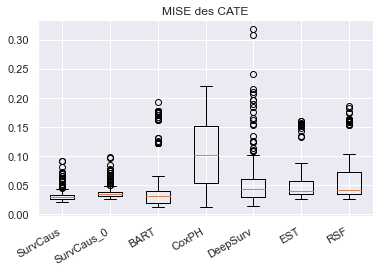

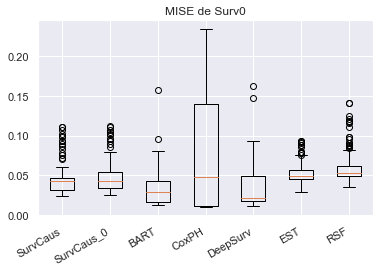

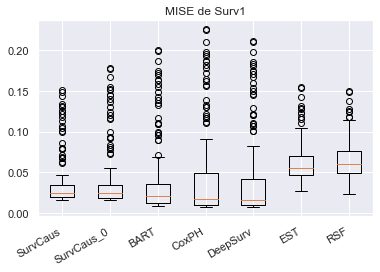

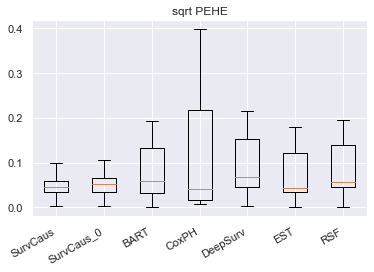

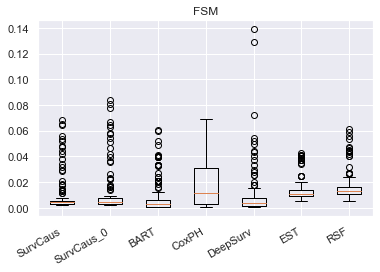

In [26]:
Ev.All_Results(list_models=list_models,
                        is_train=False,params_bart=p_bart_best)

# Benchmark

In [27]:
# Bilan of benchmark
nep.send_data(Ev.bilan_benchmark, "bilan_benchmark",num_run=0)
Ev.bilan_benchmark


,models,Mise0,Mise1,CATE,PEHE,FSM
0,SurvCaus,"(0.043, 0.017)","(0.034, 0.028)","(0.032, 0.011)","(0.048, 0.021)","(0.008, 0.012)"
1,SurvCaus_0,"(0.046, 0.017)","(0.037, 0.034)","(0.037, 0.011)","(0.054, 0.026)","(0.009, 0.015)"
2,BART,"(0.031, 0.018)","(0.037, 0.042)","(0.045, 0.045)","(0.081, 0.055)","(0.007, 0.012)"
3,CoxPH,"(0.077, 0.07)","(0.04, 0.051)","(0.101, 0.056)","(0.118, 0.133)","(0.019, 0.019)"
4,DeepSurv,"(0.035, 0.025)","(0.037, 0.047)","(0.056, 0.05)","(0.097, 0.064)","(0.008, 0.016)"
5,EST,"(0.052, 0.012)","(0.06, 0.023)","(0.051, 0.031)","(0.077, 0.05)","(0.013, 0.008)"
6,RSF,"(0.058, 0.018)","(0.063, 0.024)","(0.057, 0.035)","(0.089, 0.053)","(0.016, 0.01)"


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 600 samples in 0.001s...
[t-SNE] Computed neighbors for 600 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 600 / 600
[t-SNE] Mean sigma: 0.017888
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.421986
[t-SNE] KL divergence after 1000 iterations: 0.137162


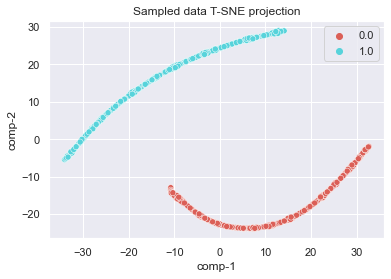

In [28]:
def get_repr(Ev):
    repr = Ev.SC.net.get_repr(torch.tensor(Ev.data.x_train))
    # repr to numpy
    repr = repr.detach().numpy()
    t = Ev.data.x_train[:,-1]
    return repr,t

def tsne_f(repr,t):
    tsne = TSNE(n_components=2, verbose=1, random_state=123)
    z = tsne.fit_transform(repr)
    d = pd.DataFrame()
    d["tt"] = t
    d["comp-1"] = z[:, 0]
    d["comp-2"] = z[:, 1]

    fig = plt.figure()
    sns.scatterplot(x="comp-1", y="comp-2", hue=d.tt.tolist(),
                palette=sns.color_palette("hls", 2),
                data=d).set(title="Sampled data T-SNE projection")
    plt.close()
    return fig
    
    
repres,t = get_repr(Ev)
tsne_survcaus_final = tsne_f(repres,t)

nep.send_plot(tsne_survcaus_final, "TSNE survcaus final",num_run=0)
tsne_survcaus_final

In [29]:
Ev.box_plot_cate
nep.send_plot(Ev.box_plot_cate, "box_plot_cate",num_run=0)


modifier S,
experiment
log - neptune
tables 
lancer :  wd, lin/nonlin, 
pas oublier brca !! 


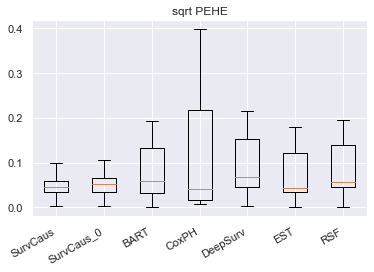

In [30]:
nep.send_plot(Ev.box_plot_pehe, "box_plot_pehe",num_run=0)
Ev.box_plot_pehe


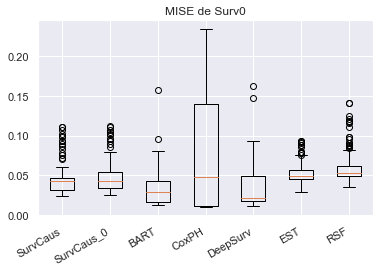

In [31]:
nep.send_plot(Ev.box_plot_surv0, "box_plot_surv0",num_run=0)
Ev.box_plot_surv0


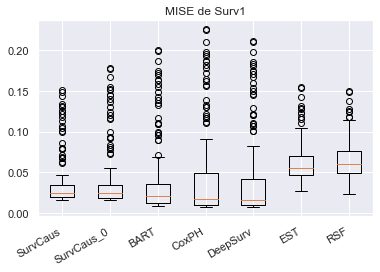

In [32]:
nep.send_plot(Ev.box_plot_surv1, "box_plot_surv1",num_run=0)
Ev.box_plot_surv1


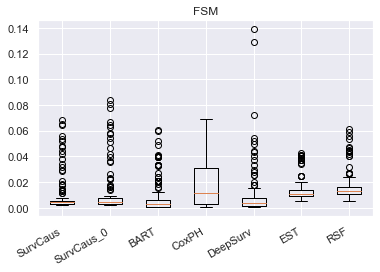

In [33]:
nep.send_plot(Ev.box_plot_FSM, "box_plot_FSM",num_run=0)
Ev.box_plot_FSM


(p_ours,p_bench) = (187, 187)
(p_ours,p_bench) = (187, 58)
(p_ours,p_bench) = (187, 30)
(p_ours,p_bench) = (187, 149)
(p_ours,p_bench) = (187, 149)
(p_ours,p_bench) = (187, 74)
(p_ours,p_bench) = (187, 132)


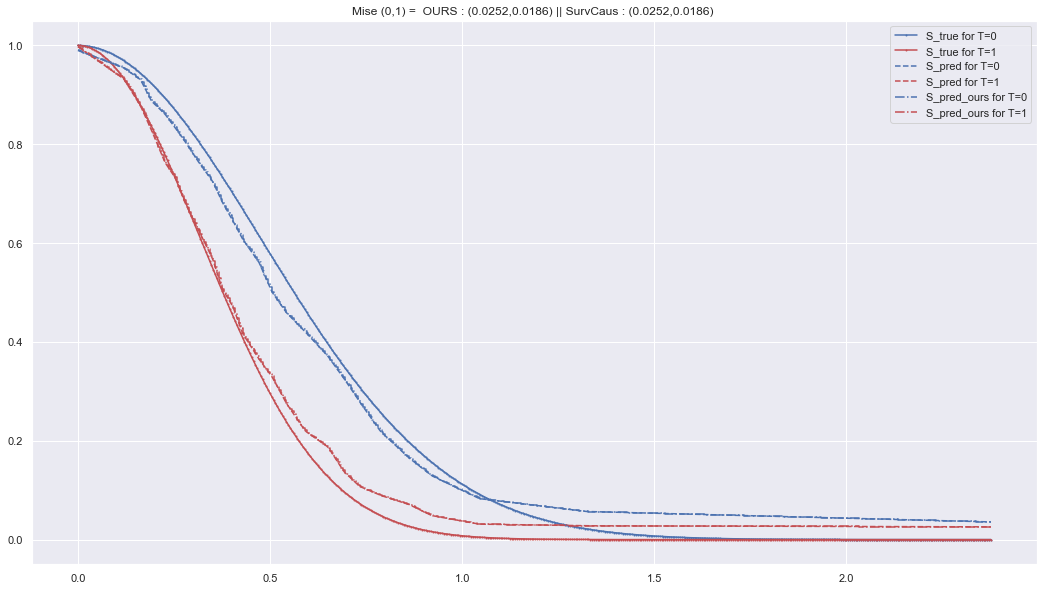

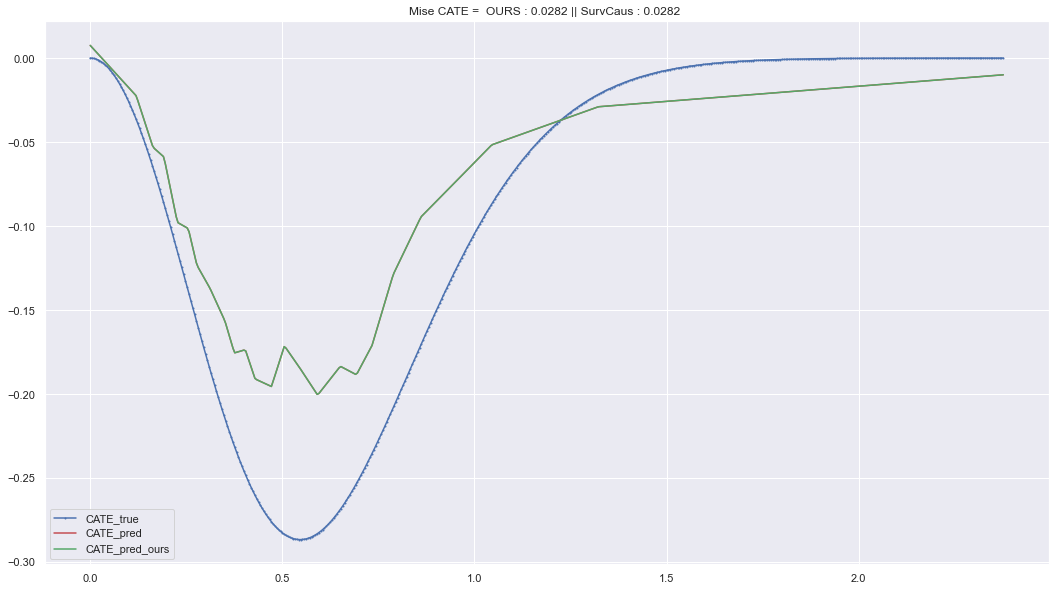

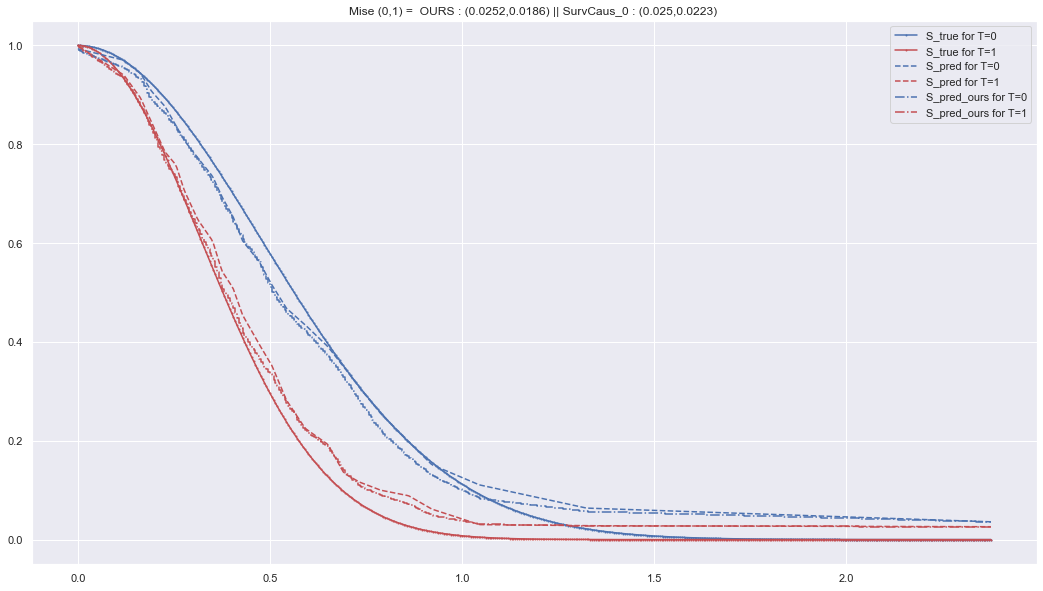

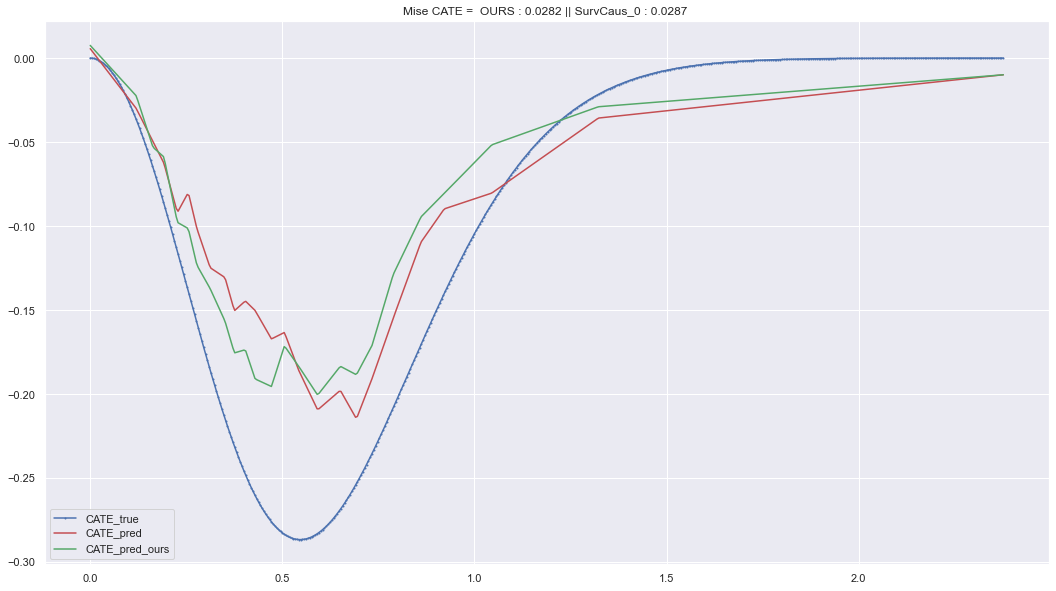

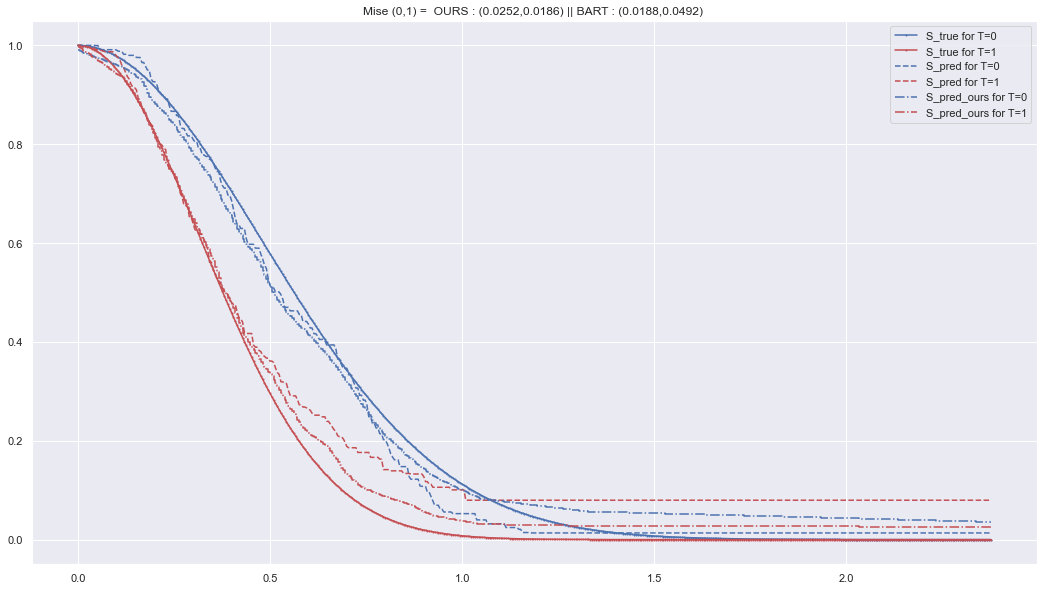

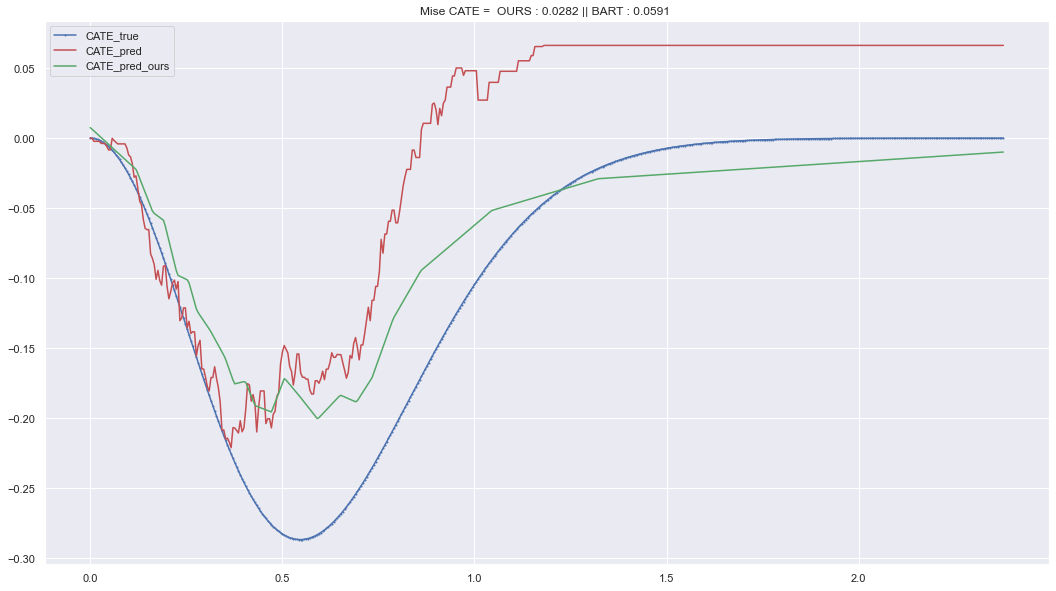

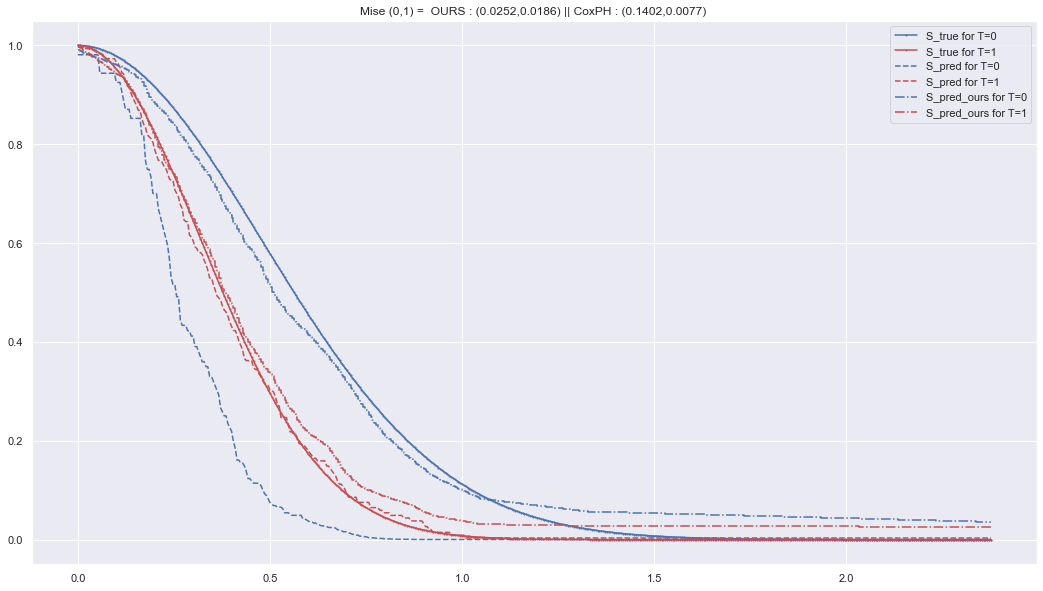

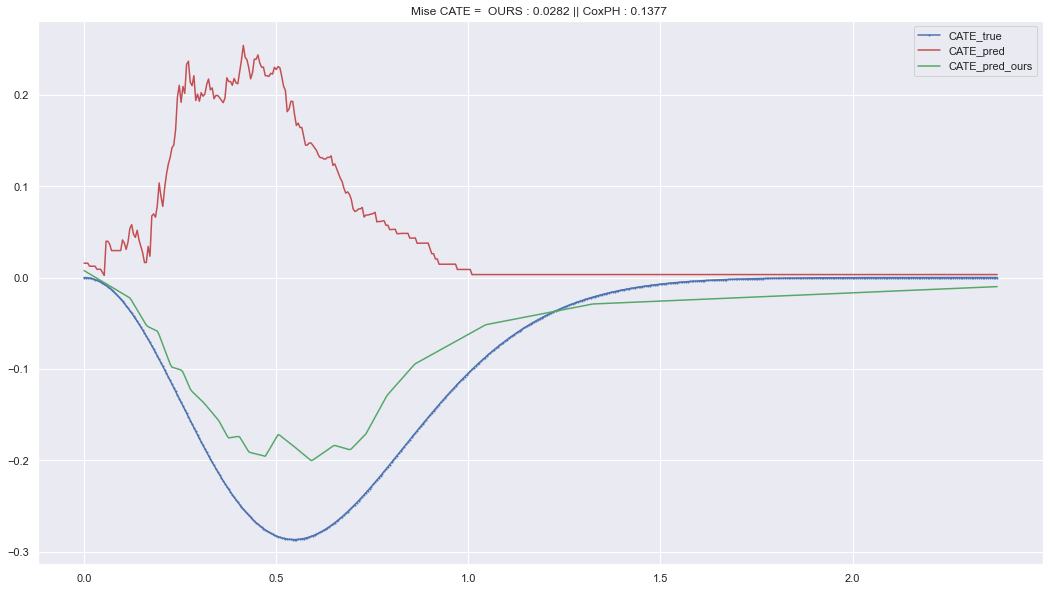

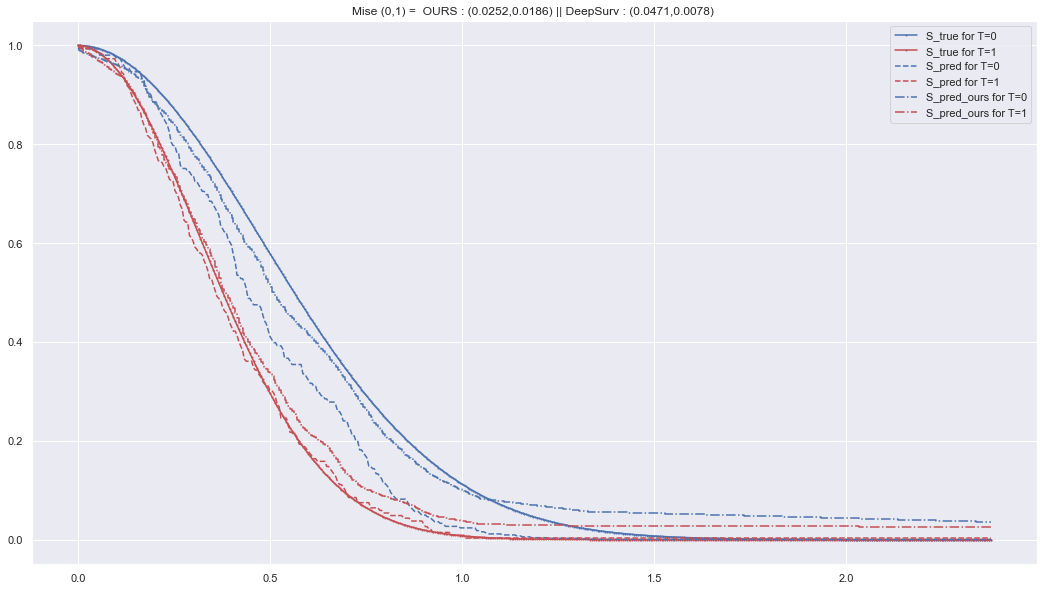

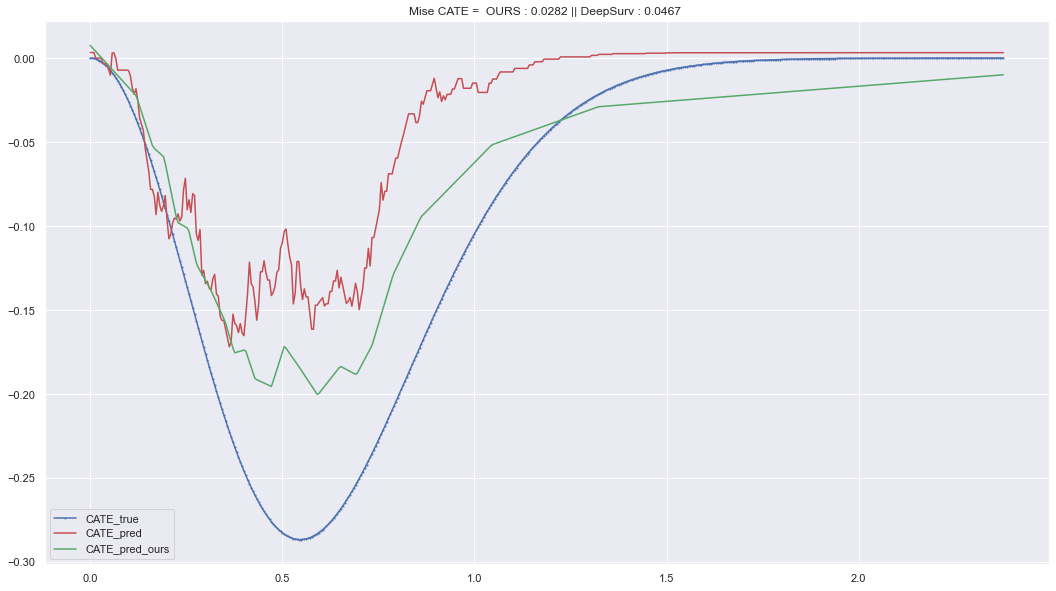

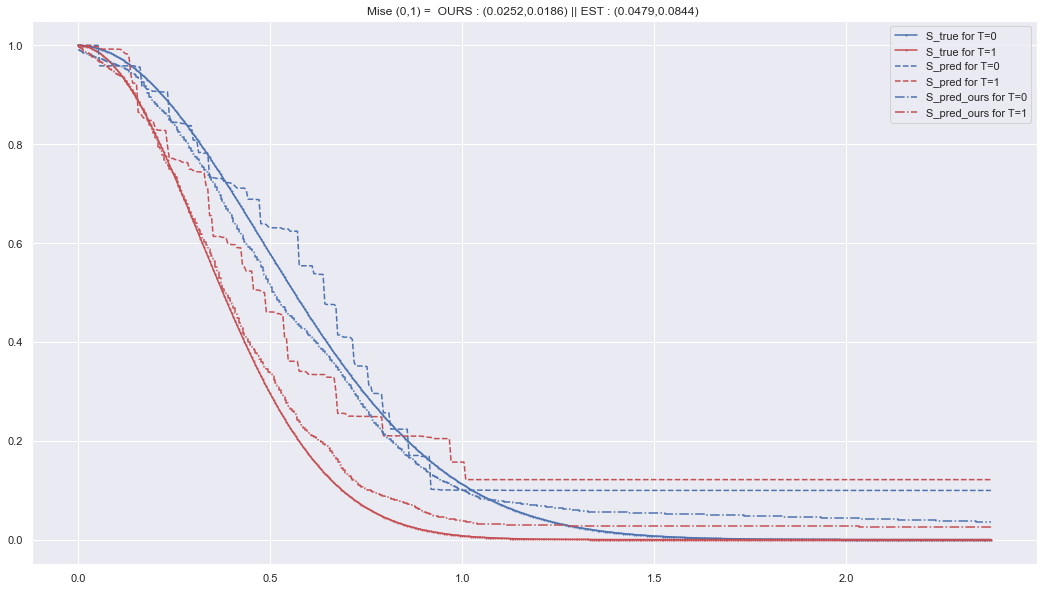

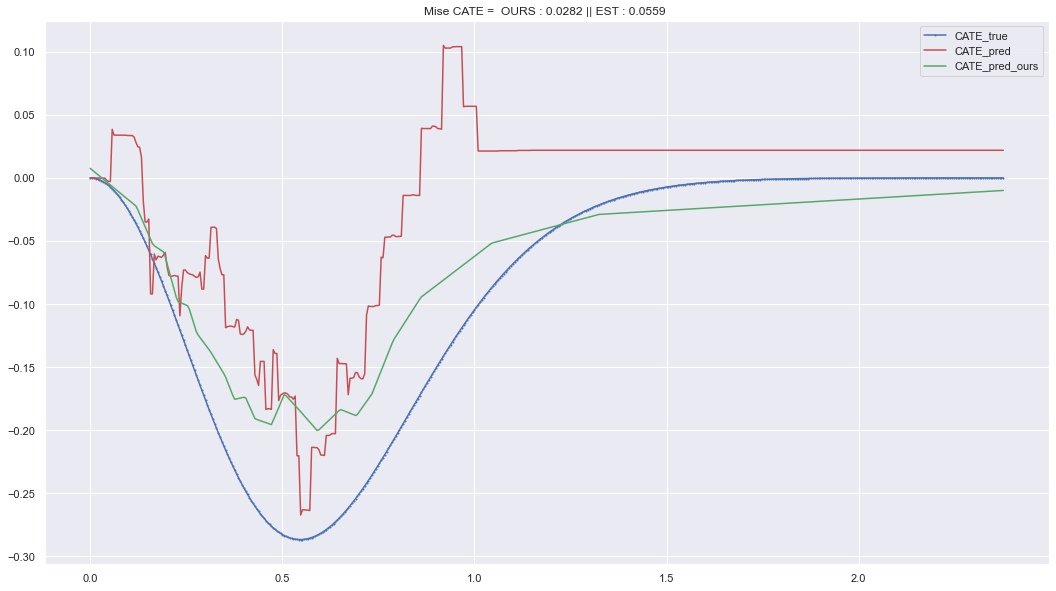

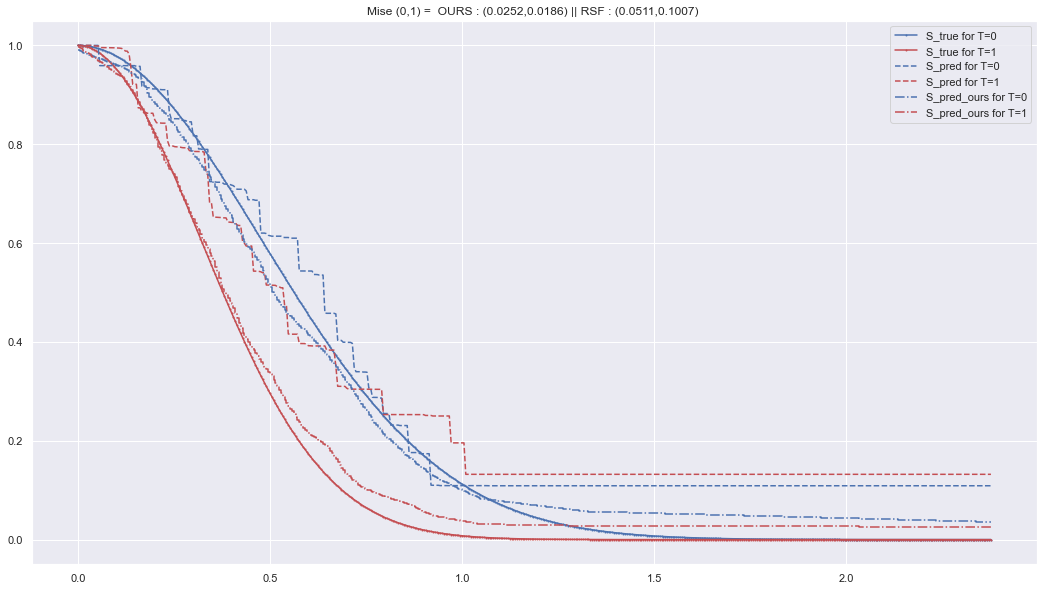

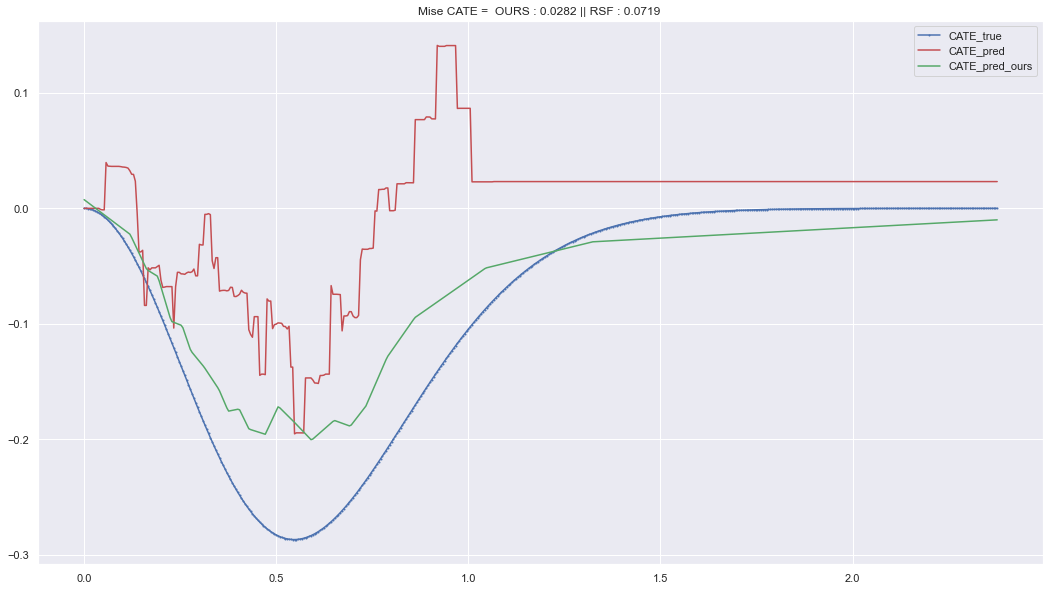

In [36]:

patient = 187
%matplotlib inline
d_q_all = {}
for model_name in Ev.list_models :
    fig_surv,fig_cate,d_q_model = plots(patient, Ev.d_list_models, model_name)
    d_q_all[model_name] = d_q_model
    nep.send_plot(fig_surv, "fig_surv_"+model_name,num_run=0)
    nep.send_plot(fig_cate, "fig_cate_"+model_name,num_run=0)


    



In [37]:

# dataframe of all the quantiles with the model name
df_q = pd.DataFrame(d_q_all)
nep.send_data(df_q, "df_q",num_run=0)
df_q


,SurvCaus,SurvCaus_0,BART,CoxPH,DeepSurv,EST,RSF
p,"[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]","[0.1, 0.25, 0.4, 0.5, 0.75, 0.9]"
t*_0 true,"[1.02, 0.8, 0.65, 0.56, 0.36, 0.22]","[1.02, 0.8, 0.65, 0.56, 0.36, 0.22]","[1.02, 0.8, 0.65, 0.56, 0.36, 0.22]","[1.02, 0.8, 0.65, 0.56, 0.36, 0.22]","[1.02, 0.8, 0.65, 0.56, 0.36, 0.22]","[1.02, 0.8, 0.65, 0.56, 0.36, 0.22]","[1.02, 0.8, 0.65, 0.56, 0.36, 0.22]"
t*_0 pred,"[1.0, 0.76, 0.61, 0.5, 0.33, 0.19]","[1.11, 0.8, 0.64, 0.52, 0.33, 0.2]","[0.91, 0.76, 0.64, 0.51, 0.36, 0.22]","[0.48, 0.38, 0.3, 0.26, 0.18, 0.11]","[0.81, 0.69, 0.51, 0.44, 0.27, 0.19]","[0.98, 0.81, 0.71, 0.64, 0.34, 0.22]","[1.07, 0.81, 0.69, 0.63, 0.34, 0.22]"
dif_0,0.03873,0.043012,0.052122,0.347611,0.128582,0.044907,0.039791
t*_1 true,"[0.69, 0.53, 0.43, 0.38, 0.24, 0.15]","[0.69, 0.53, 0.43, 0.38, 0.24, 0.15]","[0.69, 0.53, 0.43, 0.38, 0.24, 0.15]","[0.69, 0.53, 0.43, 0.38, 0.24, 0.15]","[0.69, 0.53, 0.43, 0.38, 0.24, 0.15]","[0.69, 0.53, 0.43, 0.38, 0.24, 0.15]","[0.69, 0.53, 0.43, 0.38, 0.24, 0.15]"
t*_1 pred,"[0.76, 0.57, 0.44, 0.38, 0.24, 0.15]","[0.79, 0.57, 0.47, 0.41, 0.26, 0.16]","[0.97, 0.63, 0.46, 0.39, 0.24, 0.16]","[0.7, 0.53, 0.42, 0.36, 0.23, 0.14]","[0.7, 0.53, 0.42, 0.36, 0.23, 0.14]","[1.01, 0.7, 0.54, 0.48, 0.29, 0.15]","[1.01, 0.92, 0.58, 0.53, 0.33, 0.14]"
dif_1,0.033166,0.049329,0.122134,0.011547,0.011547,0.161193,0.226458
dif,0.035948,0.04617,0.087128,0.179579,0.070065,0.10305,0.133125
